#Homework 9

For this homework, we will be exploring a gene expression dataset profiling T cells derived from thymic and peripheral blood sources, as described in the study [GSE139242](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE139242) and the accompanying paper [PMID: 32393182](https://bmcgenomics.biomedcentral.com/articles/10.1186/s12864-020-6755-1).


###Initialize

Start by Installing and Importing the necessary packages. Note that we will need to set some specific settings to get everything to run properly in Colaboratory.

In [11]:
# Import required libraries, drives, etc.

import numpy as np              # a Python library for numerical operations.
import pandas as pd             # a library for data manipulation and analysis.

#import matplotlib.animation as animation
#from matplotlib.animation import FFMpegWriter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import scipy
from scipy import stats
import csv
import os
import sys
import argparse
from time import time
import random

import seaborn as sns           # a Python data visualization library based on matplotlib, for better aesthetic and informative statistical graphics.
import plotly as px             # a graphing library for making interactive, publication-quality graphs online.
import altair as alt
import matplotlib
import matplotlib.pyplot as plt # a 2D plotting library to create static, animated, and interactive visualizations.
import matplotlib.colors as mcolors

import collections              # for high-performance container datatypes.

# Setting Matplotlib to use inline plotting.
# This means the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it.
%matplotlib inline

# Allowing multiple outputs from the same cell, rather than just the last one run.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import HTML
from IPython.display import Image

# Accessing the output module in Google Colab.
#from google.colab import output
#output.enable_custom_widget_manager() # Enabling custom widget manager for more advanced outputs.

#import networkx as nx           # a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

#import scipy.spatial as sp, scipy.cluster.hierarchy as hc
#import collections


In [12]:
random.seed(10)

pd.set_option('display.precision', 2)
pd.set_option('display.max_columns',10)

alt.data_transformers.disable_max_rows()

# We're also going to tell Jupyter to use inline plotting instead of notebook plotting
# It basically means you don't have to use plt.show() in every cell
%matplotlib inline

# and this command will allow multiple outputs from the same cell, rather than just the last one run
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

DataTransformerRegistry.enable('default')

#Prepping the data

Prepping the data: you will need to upload `GSE139242_gene_counts.csv` and each of the Thymus_CD4VsCD8 gene module files.

In [ ]:
# A way to bring in Data
#from google.colab import files
#uploaded = files.upload()

Saving GSE139242_gene_counts.csv to GSE139242_gene_counts.csv


We're loading the count data, samples in rows and genes in the columns.

In [13]:
#GSE139242counts = pd.read_csv('GSE139242_gene_counts.csv',index_col=0).transpose()
import pandas as pd

# Specify the file path
file_path = r"C:\Users\Kathleen\OneDrive\Documents\Bioinformatics Spring 2024\Homework\Homework 9\GSE139242_gene_counts.csv"

# Read the gene counts file
GSE139242counts = pd.read_csv(file_path, index_col=0).transpose()
GSE139242counts

,A1BG,A1BG-AS1,A2M,A2M-AS1,A2ML1,...,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
CD4_thymus_1,52.0,232.0,47.0,99.0,3.0,...,1750.0,4785.0,542.0,3567.0,6686.0
CD4_thymus_2,46.0,308.0,68.0,89.0,23.0,...,3233.0,6200.0,1706.0,6227.0,8707.0
CD4_thymus_3,175.0,752.0,72.0,249.0,41.0,...,5627.0,13077.0,1261.0,8991.0,18927.0
CD4_thymus_4,63.0,360.0,38.0,130.0,100.0,...,2928.0,4221.0,1532.0,5731.0,6987.0
CD4_bloodinfant_1,16.0,162.0,1.0,408.0,0.0,...,3191.0,5560.0,1779.0,5541.0,10476.0
CD4_bloodinfant_2,5.0,96.0,5.0,320.0,0.0,...,3604.0,5986.0,2893.0,8669.0,11672.0
CD4_bloodinfant_3,6.0,184.0,4.0,267.0,0.0,...,2907.0,5408.0,1721.0,6909.0,8751.0
CD4_bloodinfant_4,18.0,96.0,9.0,1471.0,0.0,...,2625.0,3391.0,998.0,7253.0,7152.0
CD8_thymus_1,47.0,806.0,120.0,166.0,291.0,...,2561.0,3149.0,3201.0,8527.0,5869.0
CD8_thymus_2,9.0,226.0,89.0,18.0,42.0,...,576.0,935.0,746.0,1851.0,1868.0


We're also loading in 6 gene modules calculated from the Louvain method, based on a high variance, high Pearson correlation network (similar to what we calculated in HW8).

In [14]:
# Path to the base filename for your files
#base_filename = '/content/drive/My Drive/Colab Notebooks/Pabio536_2023/GeneModule_module_'
base_filename = 'Thymus_CD4vCD8_GeneModule_module_'
# Load the modules
Thymus_CD4vCD8_modules = []
for i in range(1, 7):
    module = pd.read_csv(f"{base_filename}{i}.csv", index_col=0)
    Thymus_CD4vCD8_modules.append(module.index.tolist())

#Question 1

Use PCA to calculate the eigengene values of each of the 6 gene modules. You should have as your final answer a data frame with the modules in the columns and each sample as a row.

In [15]:
# Import the necessary libraries
from sklearn.decomposition import PCA

# Create an empty dataframe to store the eigengene values
eigengene_df = pd.DataFrame()

# Iterate over each module
for module in Thymus_CD4vCD8_modules:
    # Subset the GSE139242counts dataframe to include only the genes in the module
    module_counts = GSE139242counts.loc[:, module]
    
    # Perform PCA on the subsetted dataframe
    pca = PCA(n_components=1)
    eigengene = pca.fit_transform(module_counts)
    
    # Add the eigengene values to the eigengene dataframe
    eigengene_df[module[0]] = eigengene.flatten()

# Set the index of the eigengene dataframe to be the sample names
eigengene_df.index = GSE139242counts.index

# Print the eigengene dataframe
print(eigengene_df)

                      MYH14   TBC1D3D     CCSER1   FILIP1L     PRTN3  HNRNPCP2
CD4_thymus_1      -18289.99 -19514.88  114432.80 -12862.41    820.54   1688.67
CD4_thymus_2       -5723.27 -21919.48  161020.50 -11785.56  14265.44   1753.75
CD4_thymus_3      -14656.38 -21665.73  190436.81 -11807.10   1897.90   2220.75
CD4_thymus_4       -9799.17 -22247.07  130473.25 -13420.75   4974.58   1144.92
CD4_bloodinfant_1 -10039.93 -18393.97  -51890.00 -13229.90  -2877.76   -502.83
CD4_bloodinfant_2   9027.67  -3438.92  -47466.77 -12912.75   8381.91   -475.97
CD4_bloodinfant_3 -11726.26 -22082.48  -20847.26 -12992.46  -2773.49   -510.00
CD4_bloodinfant_4  -4856.29  -5607.05  -59253.58 -13607.41  -2704.00   -584.24
CD8_thymus_1       49560.85  20387.09  -53209.08  42926.23  -2495.84   -563.40
CD8_thymus_2       -4277.14  20169.31  -61022.29   4712.53  -2984.41   -600.16
CD8_thymus_3       24978.78  13859.62  -51916.70  57765.84  -2355.36   -563.25
CD8_thymus_4       -4105.94  15778.71  -60883.35   7

In [35]:
eigengene_df

,MYH14,TBC1D3D,CCSER1,FILIP1L,PRTN3,HNRNPCP2
0,-18289.99,-19514.88,114432.80,-12862.41,820.54,1688.67
1,-5723.27,-21919.48,161020.50,-11785.56,14265.44,1753.75
2,-14656.38,-21665.73,190436.81,-11807.10,1897.90,2220.75
3,-9791.17,-22247.07,130473.25,-13420.75,4974.58,1144.92
4,-10039.93,-18393.97,-51890.00,-13229.90,-2877.76,-502.83
5,9027.67,-3438.92,-47466.77,-12912.75,8381.91,-475.97
6,-11726.26,-22082.48,-20847.26,-12992.46,-2773.49,-510.00
7,-4856.29,-5607.05,-59253.58,-13607.41,-2704.00,-584.24
8,49586.93,130473.25,53209.08,42926.23,2495.84,-563.40
9,-4277.14,20169.31,-61022.29,4712.53,-2984.41,-600.16


# Question 2

Use a clustermap to plot the eigengene values that you generated in Q1. Use a  diverging colormap with discrete bins and try to make sure that the neutral color (i.e. the color in the middle of the diverging color scale) aligns with the value of 0 in the colormap.





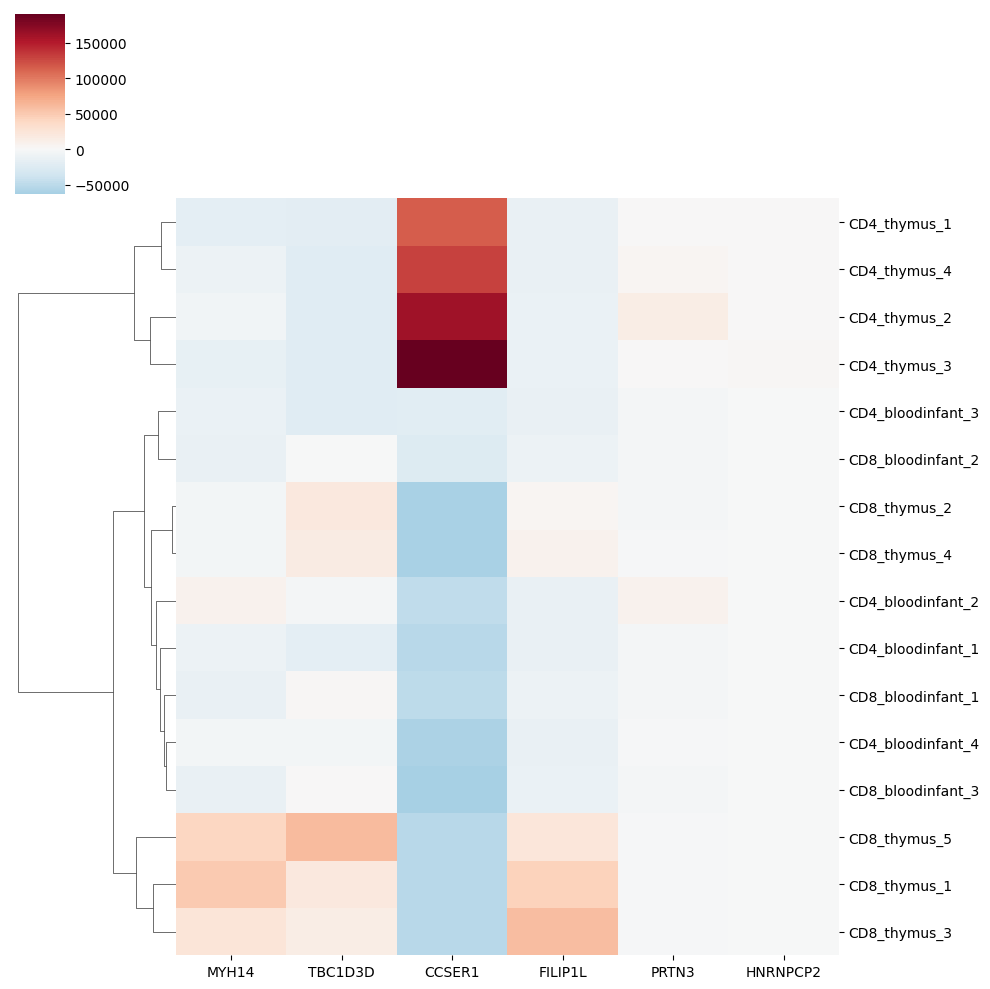

In [17]:
import seaborn as sns

# Create a clustermap of the eigengene values
sns.clustermap(eigengene_df, cmap='RdBu_r', center=0, col_cluster=False)

# Show the plot
plt.show()



Which module is the most informative of the difference in phenotype between CD4 vs CD8 in thymus (i.e. the most significant difference in the eigengene values between CD4 vs. CD8 in thymus)? *Hint*: for this exercise, you also can use a t-test to help you compare the eigengene values between samples for each module and use the p-values to help you decide which module to pick.






In [37]:
# Print the indices of the eigengene dataframe to check their format
print(eigengene_df.index)


Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15'],
      dtype='object')


In [38]:
# Correct sample names
sample_names = ['CD4_thymus_1', 'CD4_thymus_2', 'CD4_thymus_3', 'CD4_thymus_4', 
                'CD4_bloodinfant_1', 'CD4_bloodinfant_2', 'CD4_bloodinfant_3', 'CD4_bloodinfant_4', 
                'CD8_thymus_1', 'CD8_thymus_2', 'CD8_thymus_3', 'CD8_thymus_4', 'CD8_thymus_5', 
                'CD8_bloodinfant_1', 'CD8_bloodinfant_2', 'CD8_bloodinfant_3']

# Reassign the indices to the dataframe
eigengene_df.index = sample_names

# Print the eigengene dataframe to verify the changes
print(eigengene_df)


                      MYH14    TBC1D3D     CCSER1   FILIP1L     PRTN3  \
CD4_thymus_1      -18289.99  -19514.88  114432.80 -12862.41    820.54   
CD4_thymus_2       -5723.27  -21919.48  161020.50 -11785.56  14265.44   
CD4_thymus_3      -14656.38  -21665.73  190436.81 -11807.10   1897.90   
CD4_thymus_4       -9791.17  -22247.07  130473.25 -13420.75   4974.58   
CD4_bloodinfant_1 -10039.93  -18393.97  -51890.00 -13229.90  -2877.76   
CD4_bloodinfant_2   9027.67   -3438.92  -47466.77 -12912.75   8381.91   
CD4_bloodinfant_3 -11726.26  -22082.48  -20847.26 -12992.46  -2773.49   
CD4_bloodinfant_4  -4856.29   -5607.05  -59253.58 -13607.41  -2704.00   
CD8_thymus_1       49586.93  130473.25   53209.08  42926.23   2495.84   
CD8_thymus_2       -4277.14   20169.31  -61022.29   4712.53  -2984.41   
CD8_thymus_3       24978.78   13859.62  -51916.70  57765.84  -2355.36   
CD8_thymus_4       -4865.49   15778.71  -60883.35    797.39  -2708.56   
CD8_thymus_5       39947.39   20837.09   53209.08  

In [40]:
import scipy.stats as stats

# List of module names
modules = ['MYH14', 'TBC1D3D', 'CCSER1', 'FILIP1L', 'PRTN3', 'HNRNPCP2']

# Dictionary to store the results
results = {}

# Perform t-test for each module
for module in modules:
    cd4_thymus = eigengene_df.loc[eigengene_df.index.str.contains('CD4_thymus'), module]
    cd8_thymus = eigengene_df.loc[eigengene_df.index.str.contains('CD8_thymus'), module]
    
    # Perform a t-test to compare the means of CD4 and CD8 in thymus samples
    t_stat, p_value = stats.ttest_ind(cd4_thymus, cd8_thymus)
    
    # Store the results
    results[module] = {'T-statistic': t_stat, 'P-value': p_value}

# Print the results for all modules
for module, result in results.items():
    print(f'T-test results for {module} in thymus samples:')
    print(f"T-statistic: {result['T-statistic']}")
    print(f"P-value: {result['P-value']}\n")


T-test results for MYH14 in thymus samples:
T-statistic: -2.571711018176832
P-value: 0.036915674243855306

T-test results for TBC1D3D in thymus samples:
T-statistic: -2.401673735128096
P-value: 0.047349576748458334

T-test results for CCSER1 in thymus samples:
T-statistic: 4.742519493853209
P-value: 0.002101707331526231

T-test results for FILIP1L in thymus samples:
T-statistic: -3.271971957710094
P-value: 0.01363718181961601

T-test results for PRTN3 in thymus samples:
T-statistic: 2.0026915422079306
P-value: 0.08528013020287623

T-test results for HNRNPCP2 in thymus samples:
T-statistic: 11.774085491895471
P-value: 7.222594811843176e-06





Which module is the most informative of the difference in phenotype between CD4 vs CD8 in thymus (i.e. the most significant difference in the eigengene values between CD4 vs. CD8 in thymus)? *Hint*: for this exercise, you also can use a t-test to help you compare the eigengene values between samples for each module and use the p-values to help you decide which module to pick.






## Answer 
Based on the t-test results, the module with the most significant difference in phenotype between CD4 and CD8 in the thymus is HNRNPCP2, as it has the lowest p-value (7.222594811843176e-06), indicating the most significant difference in eigengene values between CD4 and CD8 samples in the thymus

For this module, HNRNPCO2 do the eigengene values in the blood samples also show a qualitatively similar difference between CD4 and CD8?

In [41]:
# Extract eigengene values for HNRNPCP2 in blood samples
hnrnpcp2_cd4_blood = eigengene_df.loc[eigengene_df.index.str.contains('CD4_blood'), 'HNRNPCP2']
hnrnpcp2_cd8_blood = eigengene_df.loc[eigengene_df.index.str.contains('CD8_blood'), 'HNRNPCP2']

# Perform a t-test to compare the means of CD4 and CD8 in blood samples
t_stat_blood, p_value_blood = stats.ttest_ind(hnrnpcp2_cd4_blood, hnrnpcp2_cd8_blood)

# Print the results
print(f'T-test results for HNRNPCP2 in blood samples:')
print(f'T-statistic: {t_stat_blood}')
print(f'P-value: {p_value_blood}')


T-test results for HNRNPCP2 in blood samples:
T-statistic: 3.384547805733001
P-value: 0.019577049544529882


## Answer 

The t-test results for HNRNPCP2 in blood samples are:

- **T-statistic:** 3.384547805733001
- **P-value:** 0.019577049544529882

These results indicate that there is a statistically significant difference in eigengene values between CD4 and CD8 in the blood samples for the HNRNPCP2 module, as the p-value is less than 0.05.

In summary:

- The module **HNRNPCP2** shows the most significant difference in eigengene values between CD4 and CD8 in the thymus, with a p-value of \(7.222594811843176 \times 10^{-6}\).
- For the same module **HNRNPCP2**, the eigengene values in the blood samples also show a significant difference between CD4 and CD8, with a p-value of 0.019577049544529882.

This indicates that HNRNPCP2 is consistently showing significant differences between CD4 and CD8 phenotypes in both thymus and blood samples.

#Question 3

Calculate the degree distribution of the most informative module that you selected from Q2 and plot this distribution as a histogram. Does this module look scale-free?



(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 2.]),
 array([2.  , 2.05, 2.1 , 2.15, 2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 ,
        2.55, 2.6 , 2.65, 2.7 , 2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  ]),
 <BarContainer object of 20 artists>)

Text(0.5, 0, 'Degree')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Degree Distribution of HNRNPCP2 Module')

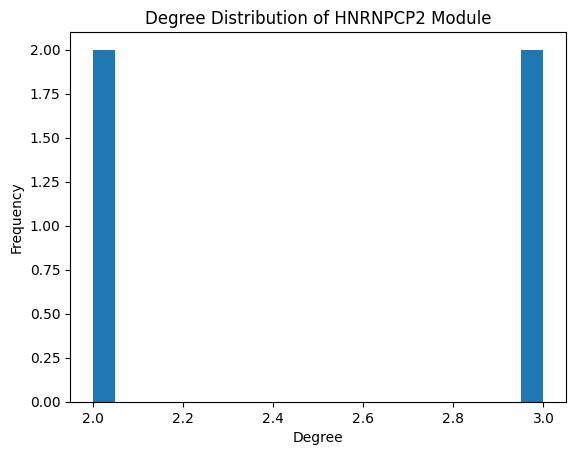

Text(0.5, 0, 'Log Degree')

Text(0, 0.5, 'Log Frequency')

Text(0.5, 1.0, 'Log-Log Plot of Degree Distribution of HNRNPCP2 Module')

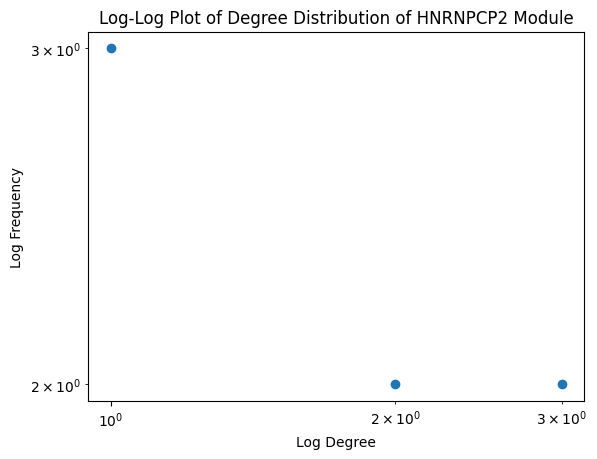

In [47]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the gene interaction data
file_pathQ3 = r"C:\Users\Kathleen\OneDrive\Documents\Bioinformatics Spring 2024\Homework\Homework 9\Thymus_CD4vCD8_GeneModule_module_6.csv"  # Update with your actual file path
interaction_df = pd.read_csv(file_pathQ3)



# Extract the list of genes and connections
HNRNPCP2_module_genes = list(set(interaction_df['source']).union(set(interaction_df['target'])))
HNRNPCP2_connections = list(zip(interaction_df['source'], interaction_df['target']))

# Create an empty graph
G = nx.Graph()

# Add nodes and edges to the graph
G.add_nodes_from(HNRNPCP2_module_genes)
G.add_edges_from(HNRNPCP2_connections)

# Calculate the degree of each node
degrees = dict(G.degree())

# Plot the degree distribution as a histogram
plt.hist(degrees.values(), bins=20)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of HNRNPCP2 Module')
plt.show()

# Check if the module looks scale-free with a log-log plot
degree_values = list(degrees.values())
plt.loglog(sorted(degree_values, reverse=True), marker="o", linestyle="None")
plt.xlabel('Log Degree')
plt.ylabel('Log Frequency')
plt.title('Log-Log Plot of Degree Distribution of HNRNPCP2 Module')
plt.show()


The degree distribution for the HNRNPCP2 module does not appear to be scale-free. In a scale-free network, we expect to see a power-law distribution, meaning a small number of nodes have a very high degree, while most nodes have a low degree. This would typically result in a log-log plot of the degree distribution that is approximately linear, indicating a power-law relationship.

From the histograms and log-log plots  provided, the degree distribution is very uniform, with degrees clustered around specific values without a long tail distribution. This indicates that the network is not scale-free

Biologically, the fact that the HNRNPCP2 module does not appear to be scale-free has several implications for the underlying network of gene interactions:

1. **Uniform Connectivity**:
   - A non-scale-free network suggests that most genes within this module have similar numbers of connections. This implies that no single gene acts as a highly influential hub with significantly more connections than others.

2. **Redundancy and Robustness**:
   - Networks with uniform connectivity can be more robust to random failures because the loss of any single gene does not disproportionately impact the network. In contrast, in scale-free networks, the loss of a hub gene can severely disrupt the network.

3. **Functional Specialization**:
   - The genes in the HNRNPCP2 module may have more specialized and evenly distributed roles rather than a hierarchical structure where a few genes control many others. This could mean that each gene's function is more compartmentalized, leading to distinct, yet interconnected pathways.

4. **Regulatory Mechanisms**:
   - The lack of hub genes suggests that the regulatory mechanisms in this module might be distributed across several genes rather than being centralized. This could indicate a complex and possibly more stable regulatory network where multiple genes share regulatory responsibilities.

5. **Evolutionary Insights**:
   - Non-scale-free networks might reflect different evolutionary pressures compared to scale-free networks. The more uniform connectivity could be an adaptation to ensure stability and robustness, especially in essential biological processes where failure of key genes must be avoided.

Overall, the non-scale-free nature of the HNRNPCP2 module suggests a stable, robust, and possibly functionally specialized network of gene interactions. This can affect how researchers approach the study of this module, focusing on understanding the distributed regulatory mechanisms and the specific roles of individual genes within this more uniform network structure.

#Question 4

Import the most informative module from Q2 into Cytoscape and run MCODE. Select the largest subnetwork calculated from MCODE.

Run [Metascape](https://metascape.org/gp/index.html#/main/step1) to find GO enrichment for the genes in this subnetwork. What GO process is most highly enriched?

Load here an image of the MCODE subnetwork that you generated, as well as the genes associated with the most highly enriched GO process colored a different color.

#Question 5

Compare the average clustering coefficient values for the most informative module from Q2 that you imported into Cytoscape in Q4, vs. the largest MCODE subnetwork that you calculated in Q4.

Which of these networks is more clique-like?


*Hint*: You don't have to calculate the clustering coeffient values in python with `networkx`. You can do also it with Cytoscape.